In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style="white", palette="muted", color_codes=True)

/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%%time
df1 = pd.read_csv('/Users/user/Desktop/application/DHL/accidents_2005_to_2007.csv',low_memory=False)
df2 = pd.read_csv('/Users/user/Desktop/application/DHL/accidents_2009_to_2011.csv',low_memory=False)
df3 = pd.read_csv('/Users/user/Desktop/application/DHL/accidents_2012_to_2014.csv',low_memory=False)

# check if the three datasets have same column headers
df1.columns.difference(df2.columns).difference(df3.columns)

# combine three datasets into one
df = pd.concat([df1, df2, df3],ignore_index=True)

print('Number of rows and collumns',df1.shape,df2.shape,df3.shape,df.shape)

Number of rows and collumns (570011, 33) (469442, 33) (464697, 33) (1504150, 33)
CPU times: user 9.45 s, sys: 1.77 s, total: 11.2 s
Wall time: 11.4 s


In [3]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [4]:
# take a peek at top 5 rows
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
# check outliers for numeric columns:
# - if mean significantly below median, we have outliers on the left of chart.
# - if mean significantly above median, we have outliers on the right of chart.
df.describe().loc[["mean", "50%"], :]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
mean,439621.405078,300158.403995,-1.436625,52.589399,30.205364,2.83819,1.831606,1.35096,4.118607,347.614855,4.087999,1009.919075,39.005398,NaN,2.675084,381.568351,1.353871,2009.369713
50%,439960.000000,268830.000000,-1.403714,52.309126,30.000000,3.00000,2.000000,1.00000,4.000000,322.000000,4.000000,129.000000,30.000000,NaN,3.000000,0.000000,1.000000,2010.000000


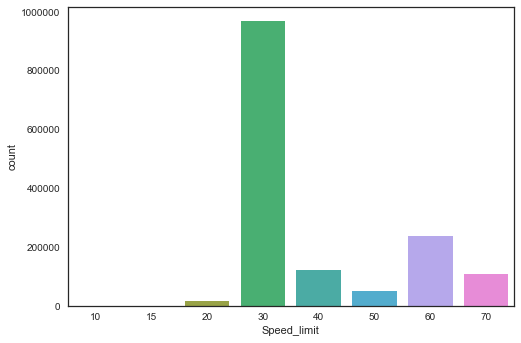

In [6]:
sns.countplot(df['Speed_limit'])

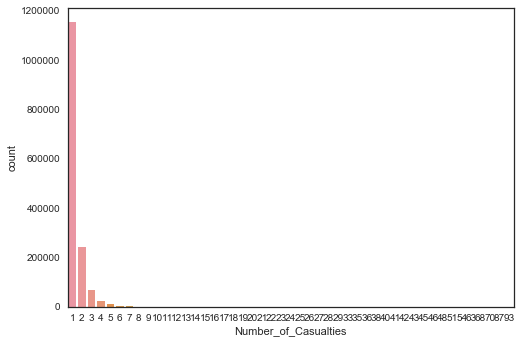

In [7]:
# the typical number of casualties is below 10
#  - which makes sense as most car contains up to 5 people, and usually 2 cars per accidents
sns.countplot(df['Number_of_Casualties'])

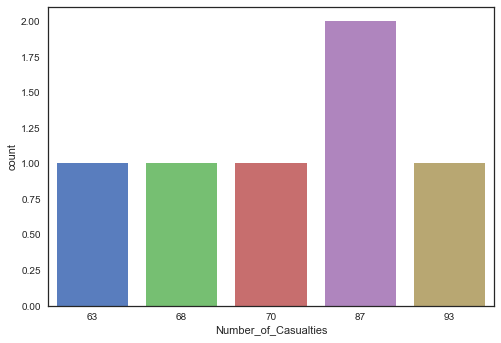

In [8]:
# Let's hunt down some outlier. We have accdients with more than 60 casualties?
outliers = df[df['Number_of_Casualties'] > 60][['Accident_Index', 'Number_of_Casualties', 'Police_Force', 
                                                'Accident_Severity', 'Date', 'Day_of_Week','Time', 
                                                'Local_Authority_(District)', 'Local_Authority_(Highway)',
                                               'Road_Type', 'Speed_limit', 'Light_Conditions','Weather_Conditions', 
                                                'Road_Surface_Conditions','Urban_or_Rural_Area']]
sns.countplot(outliers['Number_of_Casualties'])

In [9]:
outliers

,Accident_Index,Number_of_Casualties,Police_Force,Accident_Severity,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
505876,200743N002017,68,43,1,03/01/2007,4,23:44,477,E10000002,Slip road,70,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,2
925734,201106X047581,87,6,2,20/06/2011,2,15:10,107,E08000006,Dual carriageway,70,Daylight: Street light present,Fine without high winds,Dry,2
936068,2.01113E+12,63,13,3,31/01/2011,2,08:10,206,E08000036,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1
1327123,2.01E+12,70,46,2,05/09/2013,5,07:15,540,E10000016,Dual carriageway,70,Daylight: Street light present,Fog or mist,Dry,2
1402342,201411NH11644,87,11,2,03/06/2014,3,08:22,169,E06000047,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2
1449872,20144100J0489,93,41,2,20/10/2014,2,08:22,33,E10000015,Single carriageway,60,Daylight: Street light present,Fine without high winds,Dry,2


### Question 1: If we have more vehicles involved in the accident, do we have more casualties?

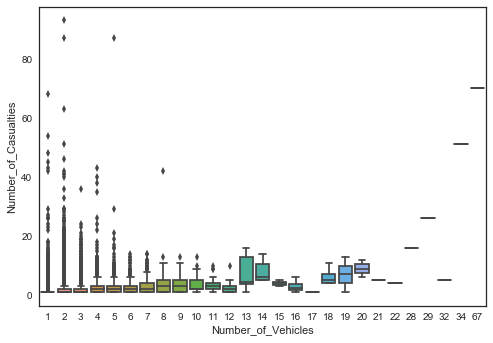

In [10]:
# Box plot! We expect to see on average (within 25-75 percentile range box), 
# more vehicles = more casualties (the boxes)
# all the dots are outliers
sns.boxplot(x="Number_of_Vehicles", y="Number_of_Casualties", data=df)

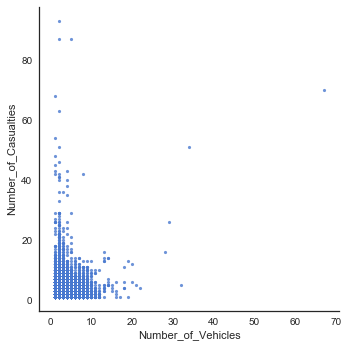

In [11]:
sns.lmplot(x='Number_of_Vehicles', # Horizontal axis
           y='Number_of_Casualties', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 10}) # S marker size

## Data Exploration Involving Time

In [12]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [13]:
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

In [14]:
# Extract month, day of month, day of year from Date Column
df['month'] = df['Date'].apply(lambda x: x.month)
df['day_of_month'] = df['Date'].apply(lambda x: x.day)
df['day_of_year'] = df['Date'].apply(lambda x: x.dayofyear)
df['hour'] = df['Time'].apply(to_hour)

## Total number of accident by Year

In [21]:
df_year

,Year,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780
3,2009,222146
4,2010,208648
5,2011,203950
6,2012,241954
7,2013,183670
8,2014,194477


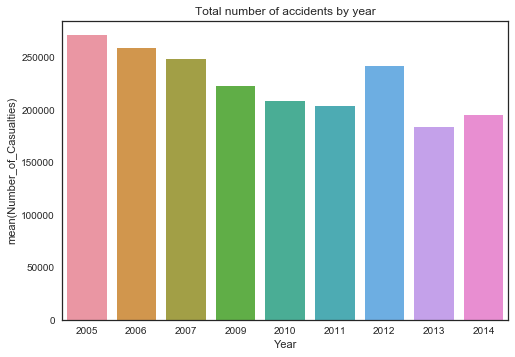

In [31]:
df_year = df.groupby('Year').sum()['Number_of_Casualties'].to_frame().reset_index()
sns.barplot(x='Year', y='Number_of_Casualties',data=df_year).set_title("Total number of accidents by year")

## Number of Casualties in Different Year and Month

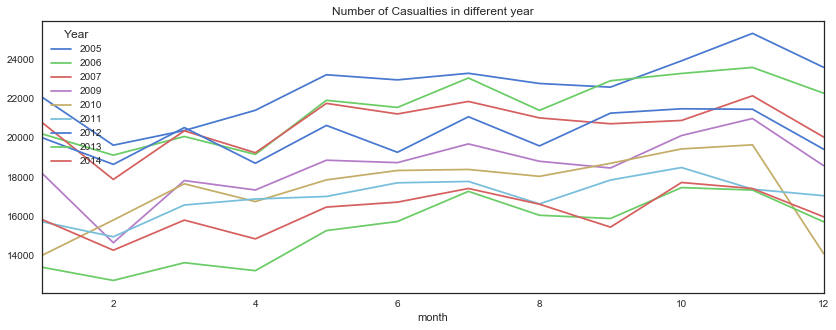

In [32]:
# Number of accident in different Month and Year
f, ax = plt.subplots(figsize=(14,5))
df_yearmonth_casualties = df.groupby(['Year','month']).sum()['Number_of_Casualties'].to_frame().reset_index()
df_yearmonth_casualties = df_yearmonth_casualties.pivot(columns='Year', values= 'Number_of_Casualties', index = 'month').plot(ax =ax)
ax.set_title('Number of Casualties in different year')

## Number of Casualties in Different Time Granularity

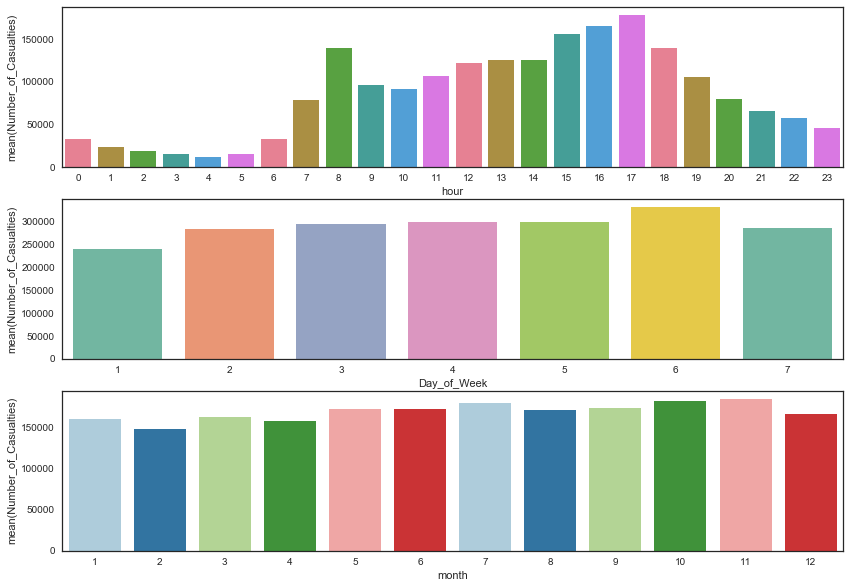

In [51]:
#plt.title('Number of Casualties in Diffirent Time')

time = df.groupby(['hour']).sum()['Number_of_Casualties'].to_frame().reset_index()
day_of_week = df.groupby(['Day_of_Week']).sum()['Number_of_Casualties'].to_frame().reset_index()
month = df.groupby(['month']).sum()['Number_of_Casualties'].to_frame().reset_index()

f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(14,10))
sns.barplot(x='hour', y='Number_of_Casualties', palette=sns.color_palette("husl"), data=time, ax=ax1)
sns.barplot(x='Day_of_Week', y='Number_of_Casualties',palette=sns.color_palette("Set2"), data=day_of_week, ax=ax2)
sns.barplot(x='month', y='Number_of_Casualties',palette=sns.color_palette("Paired"), data=month, ax=ax3)

## Type of Road

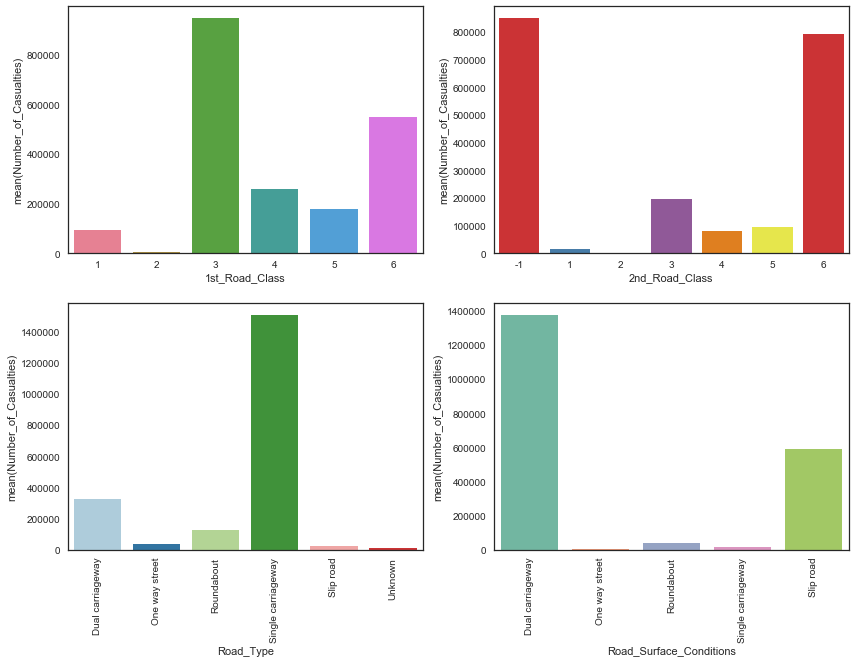

In [61]:
f,ax = plt.subplots(2,2,figsize=(14,10))
road1 = df.groupby(['1st_Road_Class']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot1 = sns.barplot(x='1st_Road_Class', y='Number_of_Casualties', palette=sns.color_palette("husl"), data=road1, ax=ax[0,0])
road2 = df.groupby(['2nd_Road_Class']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot2 = sns.barplot(x='2nd_Road_Class', y='Number_of_Casualties', palette=sns.color_palette("Set1"), data=road2, ax=ax[0,1])

road3 = df.groupby(['Road_Type']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot3 = sns.barplot(x='Road_Type', y='Number_of_Casualties', palette=sns.color_palette("Paired"), data=road3, ax=ax[1,0])
road4 = df.groupby(['Road_Surface_Conditions']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot4 = sns.barplot(x='Road_Surface_Conditions', y='Number_of_Casualties', palette=sns.color_palette("Set2"), data=road4
            , ax=ax[1,1])
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=90)
plot4.set_xticklabels(plot3.get_xticklabels(), rotation=90)

# Road Condition

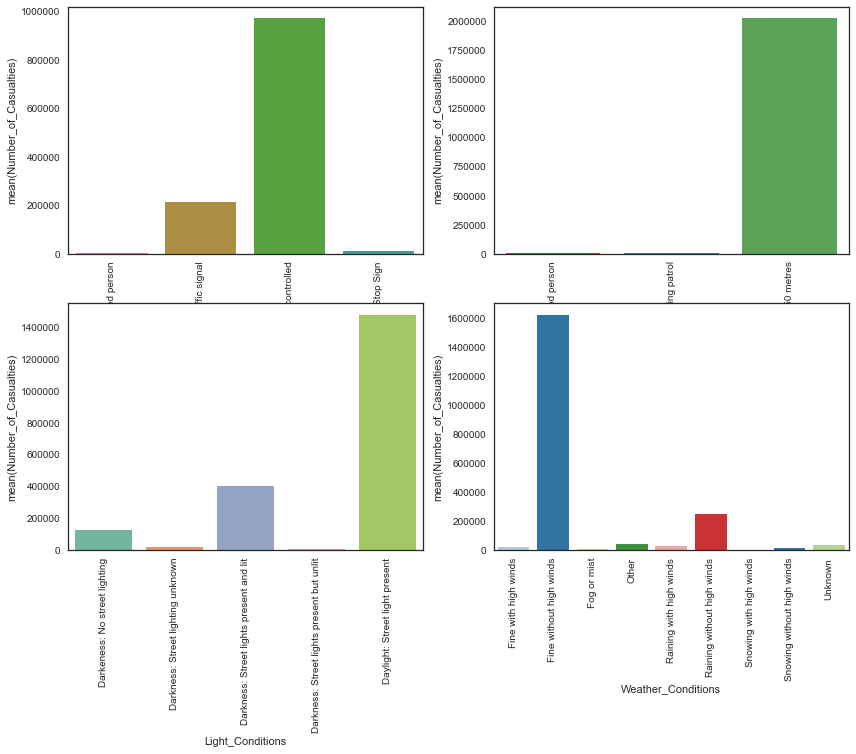

In [86]:
f,ax = plt.subplots(2,2,figsize=(14,10))
cond1 = df.groupby(['Junction_Control']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot1 = sns.barplot(x='Junction_Control', y='Number_of_Casualties', palette=sns.color_palette("husl"), data=cond1, ax=ax[0,0])
cond2 = df.groupby(['Pedestrian_Crossing-Human_Control']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot2 = sns.barplot(x='Pedestrian_Crossing-Human_Control', y='Number_of_Casualties', palette=sns.color_palette("Set1"), data=cond2, ax=ax[0,1])
cond3 = df.groupby(['Light_Conditions']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot3 = sns.barplot(x='Light_Conditions', y='Number_of_Casualties',palette=sns.color_palette("Set2"), data=cond3, ax=ax[1,0])
cond4 = df.groupby(['Weather_Conditions']).sum()['Number_of_Casualties'].to_frame().reset_index()
plot4 = sns.barplot(x='Weather_Conditions', y='Number_of_Casualties',palette=sns.color_palette("Paired"), data=cond4, ax=ax[1,1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=90)
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=90)

# Police Officer Response

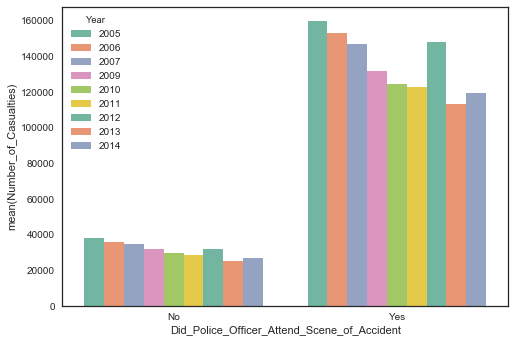

In [72]:
policeresponse = df.groupby(['Did_Police_Officer_Attend_Scene_of_Accident','Year']).count()['Number_of_Casualties'].to_frame().reset_index()
sns.barplot(x="Did_Police_Officer_Attend_Scene_of_Accident", y="Number_of_Casualties", hue="Year", palette=sns.color_palette("Set2"), data=policeresponse)

# Casualties in different Days

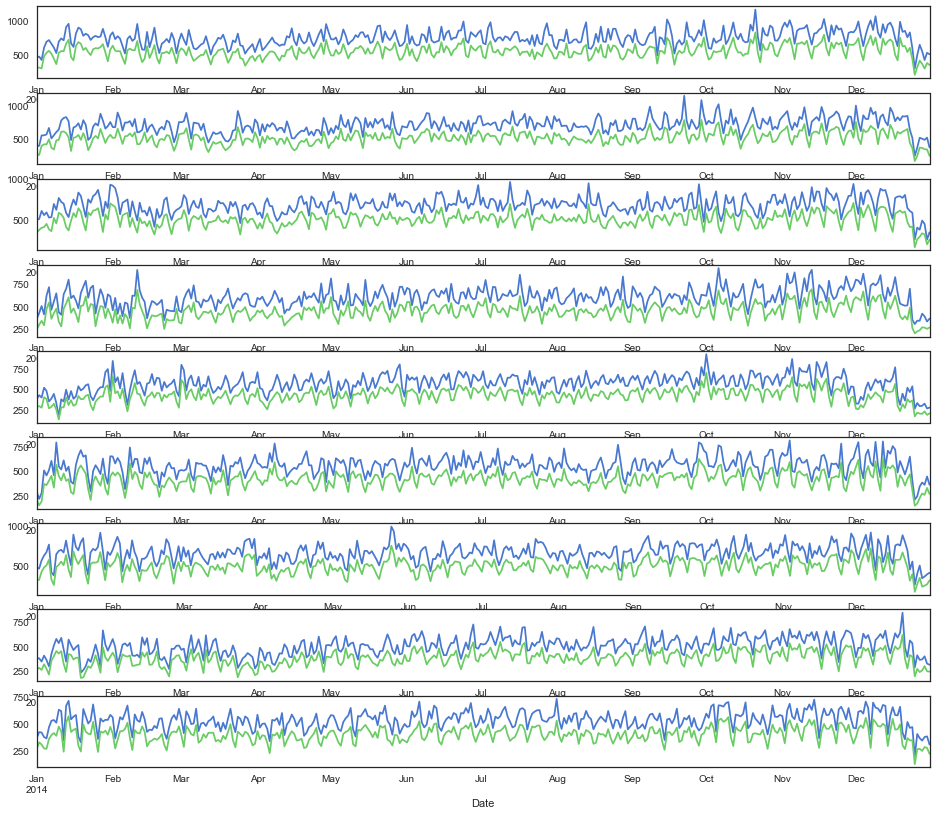

In [75]:
f,ax = plt.subplots(df['Year'].nunique(),1,figsize=(16,14))
for  i,y in enumerate(df['Year'].unique()):
    foo = df[df['Year'] == y][['Date','Number_of_Casualties']]
    foo.groupby('Date').sum()['Number_of_Casualties'].plot(ax=ax[i],label='Sum')
    foo.groupby('Date').count()['Number_of_Casualties'].plot(ax=ax[i],label='Count')

# Most Dangerous Days to Travel

In [76]:
date_wise_casualities = df.groupby(['Date'])['Date','Number_of_Casualties'].sum()
worst_accident_days = date_wise_casualities.sort_values(by='Number_of_Casualties',ascending=False)
w_20_days = worst_accident_days.head(20)
w_20_days=w_20_days.reset_index()
w_20_days['Date'] = w_20_days.astype({'Date':'str'})

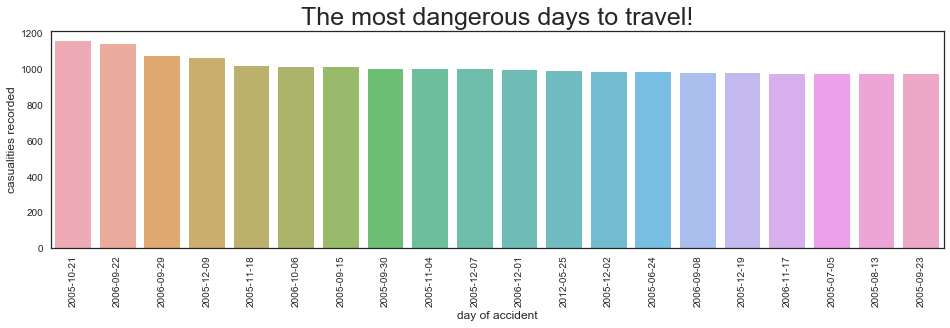

In [77]:
plt.figure(figsize=(16,4))
ax = sns.barplot(w_20_days['Date'], w_20_days['Number_of_Casualties'], alpha=0.8)
plt.title("The most dangerous days to travel!",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('casualities recorded', fontsize=12)
plt.xlabel('day of accident', fontsize=12)

plt.show()

# What is the spread of different kinds of accidents across the nation?

In [79]:
level3 = df[df['Accident_Severity'] == 3]
level2 = df[df['Accident_Severity'] == 2]
level1 = df[df['Accident_Severity'] == 1]

/Users/user/anaconda3/envs/7mw/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


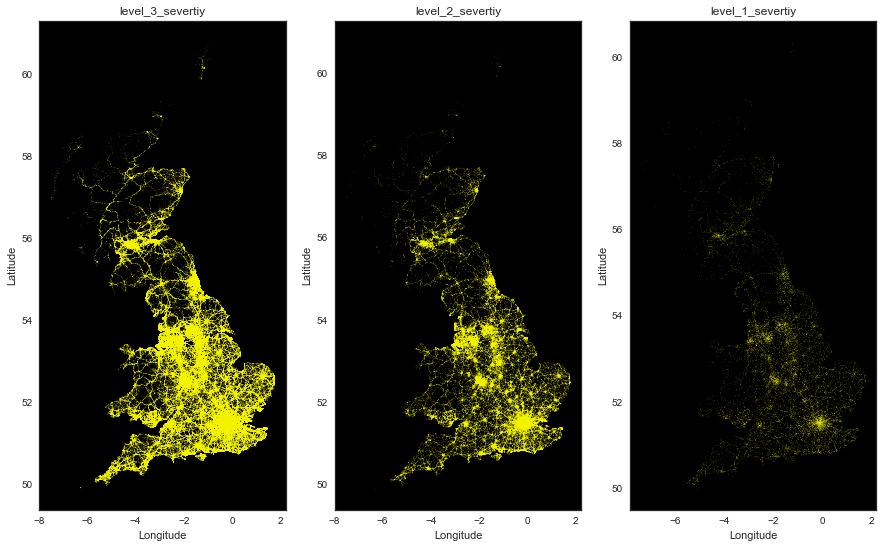

In [81]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,9))

## level 3 plot
level3.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("level_3_severtiy")
ax1.set_facecolor('black')

## level 2 plot
level2.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("level_2_severtiy")
ax2.set_facecolor('black')

# level 1 plot

level1.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("level_1_severtiy")
ax3.set_facecolor('black')

# It looks like, regardless of the severity, a lot of accidents are concentrated around the same area.

f.show()


In [83]:
# Identifying the worst districts to travel.
area_wise = df.groupby(['Local_Authority_(District)'])['Number_of_Casualties'].size()
area_wise = area_wise.sort_values(ascending=False)
area_wise = area_wise.reset_index()
area_wise = area_wise.head(10).style
area_wise

## London's Most Dangerous Highway

In [84]:
highway_to_hell = df[df['Local_Authority_(District)'] == 300]['Local_Authority_(Highway)'].unique()
print("London's most dangerous highway is {}".format(highway_to_hell))      

London's most dangerous highway is ['E08000025']
